# INDIAN STARTUP ECOSYSTEM ANALYSIS

BUSINESS UNDERSTANDING


Our team is exploring the Indian startup ecosystem to understand funding trends and identify promising opportunities. The goal is to analyze funding data from 2018 to 2021, focusing on key factors such as the amount of funding received, sectors, stages of investment, and geographic locations



HPOTHESIS TESTING


Null Hypothesis (H0): There is no significant difference in the amount of funding received by startups across different sectors and stages.



Alternate Hypothesis (H1): There is a significant difference in the amount of funding received by startups across different sectors and stages.



DATA UNDERSTANDING


COLUMNS IN THE DATASET


Company_Brand: Name of the startup.

Founded: Year the startup was founded.

HeadQuarter: City where the startup is headquartered.

Sector: Industry sector of the startup.

What_it_does: Brief description of the startup's business.

Founders: Names of the founders.

Investor: Investors or investment firms that funded the startup.

Amount: Amount of funding received (in dollars).

Stage: Stage of investment (e.g., Pre-seed, Seed, Series A).


ANALYTICAL QUESTIONS


1. Sector Analysis:
- Which sectors have received the most funding, and how does the funding distribution vary across sectors?


2.  Sector Analysis
- What are the key sectors that exhibit a high number of startups, and how does this startup count vary across different sectors?


3. Stage Analysis:
- What is the distribution of funding across different investment stages (e.g., Pre-seed, Seed, Series A)?


4. Geographical Analysis:
- Which cities or regions have the highest concentration of funded startups?


5. Investor Influence:
- Who are the top investors in the Indian startup ecosystem, and what is their funding pattern?

In [68]:
%pip install pyodbc  
%pip install python-dotenv 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [69]:
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import plotly.graph_objs as go

import warnings 

warnings.filterwarnings('ignore')

In [70]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [71]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [72]:
# This will connect to the server and might take a few seconds to be complete.

connection = pyodbc.connect(connection_string)

# STARTUP ECOSYSTEM 2018-2021

In [73]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = '''SELECT * FROM dbo.LP1_startup_funding2020'''
query = '''SELECT * FROM dbo.LP1_startup_funding2021'''
data_2018 = pd.read_csv('C:\\Users\\Admin\\Music\\Demo-indian-start-up\\Notebooks\\startup_funding2018.csv')
data_2018
data_2019 = pd.read_csv('C:\\Users\\Admin\\Music\\Demo-indian-start-up\\Notebooks\\startup_funding2019.csv')
data_2019
data_2020 = pd.read_sql(query, connection)
data_2020
data_2021 = pd.read_sql(query, connection)
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


# EXPLORING THE DATA

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# DATA_2018

In [75]:
#Knowing the first 10 rows
data_2018.head(10)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [76]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


# DATA_2019

In [77]:
data_2019.head(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"$20,000,000",Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G


In [78]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


# DATA_2020

In [79]:
data_2020.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None


In [80]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


# DATA_2021

In [81]:
data_2021.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None


In [82]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


Realising All Datset Has Same Columns with the Exception of 2018, I Decide to Standardise 2018 column since it contains same information as the others and then concatenate all the dataset.

Standardising 2018 columns

In [83]:
#Rename columns of data_2018 to match combined_data
data_2018 = data_2018.rename(columns={
    'Company Name': 'Company_Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Amount': 'Amount',
    'Location': 'HeadQuarter',
    'About Company': 'What_it_does'
})

# CONCATENATING ALL THE DATASET

In [84]:
# Combine all datasets
df_combined = pd.concat([data_2019, data_2020, data_2021, data_2018], ignore_index=True)

#More Exploration of the combined

In [85]:
df_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,2476.0,2016.6042,4.496199,1963.0,2015.0,2018.0,2020.0,2021.0


In [86]:
df_combined.dtypes

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
Company_Brand     object
What_it_does      object
Amount            object
dtype: object

In [87]:
df_combined.nunique()

Company/Brand      87
Founded            30
HeadQuarter       123
Sector            664
What it does       88
Founders         1173
Investor         1013
Amount($)          50
Stage              52
Company_Brand    1498
What_it_does     1656
Amount            454
dtype: int64

In [88]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        2476 non-null   float64
 2   HeadQuarter    3012 non-null   object 
 3   Sector         3028 non-null   object 
 4   What it does   89 non-null     object 
 5   Founders       2496 non-null   object 
 6   Investor       2383 non-null   object 
 7   Amount($)      89 non-null     object 
 8   Stage          2131 non-null   object 
 9   Company_Brand  2944 non-null   object 
 10  What_it_does   2944 non-null   object 
 11  Amount         2938 non-null   object 
dtypes: float64(1), object(11)
memory usage: 284.5+ KB


In [89]:
df_combined.shape

(3033, 12)

In [90]:
df_combined.duplicated().sum()

1229

In [91]:
df_combined.isna().sum()

Company/Brand    2944
Founded           557
HeadQuarter        21
Sector              5
What it does     2944
Founders          537
Investor          650
Amount($)        2944
Stage             902
Company_Brand      89
What_it_does       89
Amount             95
dtype: int64

# DATA CLEANING

#Realising the duplicated column Names, I decided to rename and Standardise them.

In [92]:
# Renaming columns to standardize names
df_combined.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
}, inplace=True)


In [93]:
# Check for duplicated columns
df_combined.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True])

In [94]:
# Rename duplicate columns to make them unique
df_combined.columns = ['Company_Brand_1', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does_1', 'Founders', 'Investor', 'Amount_1', 'Stage', 'Company_Brand_2', 'What_it_does_2', 'Amount_2']

# Merge the duplicated columns
df_combined['Company_Brand'] = df_combined['Company_Brand_1'].combine_first(df_combined['Company_Brand_2'])
df_combined['What_it_does'] = df_combined['What_it_does_1'].combine_first(df_combined['What_it_does_2'])
df_combined['Amount'] = df_combined['Amount_1'].combine_first(df_combined['Amount_2'])

# Drop the original duplicated columns after merging
df_combined.drop(columns=['Company_Brand_1', 'Company_Brand_2', 'What_it_does_1', 'What_it_does_2', 'Amount_1', 'Amount_2'], inplace=True)

In [95]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Founded        2476 non-null   float64
 1   HeadQuarter    3012 non-null   object 
 2   Sector         3028 non-null   object 
 3   Founders       2496 non-null   object 
 4   Investor       2383 non-null   object 
 5   Stage          2131 non-null   object 
 6   Company_Brand  3033 non-null   object 
 7   What_it_does   3033 non-null   object 
 8   Amount         3027 non-null   object 
dtypes: float64(1), object(8)
memory usage: 213.4+ KB


In [96]:
# Check for missing values
missing_values = df_combined.isnull().sum()

# Print the missing values for each column
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Founded          557
HeadQuarter       21
Sector             5
Founders         537
Investor         650
Stage            902
Company_Brand      0
What_it_does       0
Amount             6
dtype: int64


# COLUMN BY COLUMN CLEANING

COLUMN-AMOUNT

In [97]:
df_combined['Amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000', '$1,200,000', '$51,000,000', '$188,000,000',
       '$200,000', '$3,000,000', '$700,000', '$9,000,000', '$40,000,000',
       '$49,000,000', '$300,000', '$160,000,000', '$1,800,000',
       '

In [98]:
# Function to clean and normalize the 'Amount' column
def clean_amount(amount):
    if pd.isna(amount) or amount in ['Undisclosed', '$Undisclosed', 'Upsparks']:
        return np.nan
    amount = amount.replace(',', '').replace('$', '').replace('₹', '')
    try:
        amount = float(amount)
    except ValueError:
        return np.nan
    return amount

# Apply the cleaning function to the 'Amount' column
df_combined['Amount'] = df_combined['Amount'].apply(clean_amount)

# Create a temporary column to identify the currency type
df_combined['Currency'] = df_combined['Amount'].apply(lambda x: 'INR' if '₹' in str(x) else 'USD')

# Function to convert all amounts to USD
def convert_currency(amount, currency):
    if currency == 'INR':
        return amount * 0.013  # Assuming an exchange rate of 1 INR = 0.013 USD
    return amount

In [99]:
# Convert all amounts to USD
df_combined['Amount'] = df_combined.apply(lambda row: convert_currency(row['Amount'], row['Currency']), axis=1)

# Drop the temporary 'Currency' column
df_combined.drop(columns=['Currency'], inplace=True)

# Convert the cleaned 'Amount' column to numeric, forcing errors to NaN
df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')

# Check for missing values before filling
missing_values_before = df_combined['Amount'].isnull().sum()
print(f"Missing values in 'Amount' column before filling: {missing_values_before}")

# Fill remaining missing values in 'Amount' column with the median value
df_combined['Amount'].fillna(df_combined['Amount'].median(), inplace=True)

# Check for missing values after filling
missing_values_after = df_combined['Amount'].isnull().sum()
print(f"Missing values in 'Amount' column after filling: {missing_values_after}")

# Check the cleaned DataFrame
df_combined.info()

Missing values in 'Amount' column before filling: 466
Missing values in 'Amount' column after filling: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Founded        2476 non-null   float64
 1   HeadQuarter    3012 non-null   object 
 2   Sector         3028 non-null   object 
 3   Founders       2496 non-null   object 
 4   Investor       2383 non-null   object 
 5   Stage          2131 non-null   object 
 6   Company_Brand  3033 non-null   object 
 7   What_it_does   3033 non-null   object 
 8   Amount         3033 non-null   float64
dtypes: float64(2), object(7)
memory usage: 213.4+ KB


COLUMN - FOUNDED

In [100]:
df_combined['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008., 2021., 2020., 1993., 1999., 1989.,
       2009., 2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998.,
       1991., 1984., 2005., 1963.])

In [101]:

#  Renaming the  'founded' column
#df_combined.rename(columns={'Founded': 'Year'}, inplace=True)

# Convert the 'Year' column to integers
#df_combined['Year'] = df_combined['Year'].dropna().astype(int)

# Convert the 'Year' column to datetime format, keeping only the year information
#df_combined['Year'] = pd.to_datetime(df_combined['Year'], format='%Y').dt.year

# Check unique values to ensure conversion
#df_combined['Year'].unique()


In [102]:
# Rename the column
df_combined.rename(columns={'Founded': 'Year'}, inplace=True)

# Convert the 'Year' column to datetime format (handling NaNs appropriately)
df_combined['Year'] = pd.to_datetime(df_combined['Year'], format='%Y', errors='coerce')

# Check unique values to ensure conversion
df_combined['Year'].unique()



<DatetimeArray>
[                'NaT', '2014-01-01 00:00:00', '2004-01-01 00:00:00',
 '2013-01-01 00:00:00', '2010-01-01 00:00:00', '2018-01-01 00:00:00',
 '2019-01-01 00:00:00', '2017-01-01 00:00:00', '2011-01-01 00:00:00',
 '2015-01-01 00:00:00', '2016-01-01 00:00:00', '2012-01-01 00:00:00',
 '2008-01-01 00:00:00', '2021-01-01 00:00:00', '2020-01-01 00:00:00',
 '1993-01-01 00:00:00', '1999-01-01 00:00:00', '1989-01-01 00:00:00',
 '2009-01-01 00:00:00', '2002-01-01 00:00:00', '1994-01-01 00:00:00',
 '2006-01-01 00:00:00', '2000-01-01 00:00:00', '2007-01-01 00:00:00',
 '1978-01-01 00:00:00', '2003-01-01 00:00:00', '1998-01-01 00:00:00',
 '1991-01-01 00:00:00', '1984-01-01 00:00:00', '2005-01-01 00:00:00',
 '1963-01-01 00:00:00']
Length: 31, dtype: datetime64[ns]

In [103]:
# Handle missing values by filling with the forward fill

# Fill missing values with the forward fill
df_combined['Year'] = df_combined['Year'].fillna(method='ffill')

# Ensure the 'Year' column is in datetime format
df_combined['Year'] = pd.to_datetime(df_combined['Year'], format='%Y', errors='coerce')

# If the first value is still NaT, use backward fill for the first value
df_combined['Year'] = df_combined['Year'].fillna(method='bfill')

# Check the DataFrame info to ensure proper conversion and filling
df_combined.info()



# Fill missing values with the forward fill
#df_combined['Year'] = df_combined['Year'].fillna(method='ffill')

# If the first value is still NaT, use backward fill for the first value
#df_combined['Year'] = df_combined['Year'].fillna(method='bfill')

# Check the DataFrame info to ensure proper conversion and filling
#df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           3033 non-null   datetime64[ns]
 1   HeadQuarter    3012 non-null   object        
 2   Sector         3028 non-null   object        
 3   Founders       2496 non-null   object        
 4   Investor       2383 non-null   object        
 5   Stage          2131 non-null   object        
 6   Company_Brand  3033 non-null   object        
 7   What_it_does   3033 non-null   object        
 8   Amount         3033 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 213.4+ KB


COLUMN - HEADQUARTER

In [104]:
df_combined['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan', 'Ahmadabad', None, 'Small Towns, Andhra Pradesh',
       'Goa', 'Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Gujarat',
       'Thane', 'Computer Games', 'Cochin', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Mohali', 'Indore', 'Powai', 'Ghaziabad', 'Nagpur',
       'West Bengal', 'Patna', 'Samsitpur', 'Lucknow', 'Silvassa',
       'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
       'Panchkula', 'Coimbatore', 'Andheri', 'Mangalore', 'Telugana',
       'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji', 'Satara',
       'Orissia', 'Jodhpur', 'New York', 'Santra', 'Mountain View, CA',
       'Trivandrum', 'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'K

In [105]:
# Step 1: Replace anomalies like '\t#REF!' and other known errors
df_combined['HeadQuarter'] = df_combined['HeadQuarter'].replace({
    '\t#REF!': '',
    'Pharmaceuticals\t#REF!': 'Pharmaceuticals',
    'Gurugram\t#REF!': 'Gurugram',
    'Telugana': 'Telangana',
    'Orissia': 'Odisha',
    'Small Towns, Andhra Pradesh': 'Andhra Pradesh',
    'Bangalore': 'Bengaluru',
    'Gurgaon': 'Gurugram',
    'Pune, Maharashtra, India': 'Pune',
    'Hyderabad, Andhra Pradesh, India': 'Hyderabad',
    'Bangalore, Karnataka, India': 'Bengaluru',
    'Mumbai, Maharashtra, India': 'Mumbai',
    'Noida, Uttar Pradesh, India': 'Noida',
    'Chennai, Tamil Nadu, India': 'Chennai',
    'New Delhi, Delhi, India': 'New Delhi',
    'Delhi, Delhi, India': 'Delhi',
    'Haryana, Haryana, India': 'Haryana', 
    'Cochin, Kerala, India': 'Cochin',
    'Jaipur, Rajasthan, India': 'Jaipur',
    'Kolkata, West Bengal, India': 'Kolkata',
    'Powai, Assam, India': 'Powai',
    'Ghaziabad, Uttar Pradesh, India': 'Ghaziabad',
    'Mylapore, Tamil Nadu, India': 'Mylapore',
    'Lucknow, Uttar Pradesh, India': 'Lucknow',
    
})

In [106]:
# Step 2: Remove anomalies and whitespace
df_combined['HeadQuarter'] = df_combined['HeadQuarter'].str.replace(r'\t#REF!', '', regex=True).str.strip()

# Step 3: Standardize city and state/country names
# Create a mapping dictionary for standardizing names
standard_city_names = {
    'Mumbai': 'Mumbai',
    'Bengaluru': 'Bengaluru',
    'Hyderabad': 'Hyderabad',
    'Chennai': 'Chennai',
    'Pune': 'Pune',
    'Noida': 'Noida',
    'New Delhi': 'New Delhi',
    'Delhi': 'Delhi',
    'Gurugram': 'Gurugram',
    'Gurgaon': 'Gurugram',
    'Kolkata': 'Kolkata',
    'Rajasthan': 'Rajasthan',  
    'Odisha': 'Odisha',  
    'Goa': 'Goa',  
    'Gujarat': 'Gujarat',  
    'West Bengal': 'West Bengal',  
    'Jharkhand': 'Jharkhand',  
    'Uttar Pradesh': 'Uttar Pradesh',  
    'Haryana': 'Haryana',  
    'Madhya Pradesh': 'Madhya Pradesh',  
    'Kerala': 'Kerala',  
    'Punjab': 'Punjab',  
    'Andhra Pradesh': 'Andhra Pradesh'
}


In [107]:
# Apply the standardization
df_combined['HeadQuarter'] = df_combined['HeadQuarter'].replace(standard_city_names)

# Step 4: Handle missing values
# For this example, let's fill missing values with 'Unknown'
df_combined['HeadQuarter'].fillna('Unknown', inplace=True)

# Check the cleaned HeadQuarter column
print(df_combined['HeadQuarter'].unique())

# Ensure proper conversion and filling
df_combined.info()

['Unknown' 'Mumbai' 'Chennai' 'Telangana' 'Pune' 'Bengaluru' 'Noida'
 'Delhi' 'Ahmedabad' 'Gurugram' 'Haryana' 'Chandigarh' 'Jaipur'
 'New Delhi' 'Surat' 'Uttar pradesh' 'Hyderabad' 'Rajasthan' 'Ahmadabad'
 'Andhra Pradesh' 'Goa' 'Rajsamand' 'Ranchi' 'Faridabad, Haryana'
 'Gujarat' 'Thane' 'Computer Games' 'Cochin' 'Vadodara' 'Food & Beverages'
 'Pharmaceuticals' 'Kolkata' 'Mohali' 'Indore' 'Powai' 'Ghaziabad'
 'Nagpur' 'West Bengal' 'Patna' 'Samsitpur' 'Lucknow' 'Silvassa'
 'Thiruvananthapuram' 'Faridabad' 'Roorkee' 'Ambernath' 'Panchkula'
 'Coimbatore' 'Andheri' 'Mangalore' 'Bhubaneswar' 'Kottayam' 'Beijing'
 'Panaji' 'Satara' 'Odisha' 'Jodhpur' 'New York' 'Santra'
 'Mountain View, CA' 'Trivandrum' 'Jharkhand' 'Kanpur' 'Bhilwara'
 'Guwahati' 'Online Media' 'Kochi' 'London'
 'Information Technology & Services' 'The Nilgiris' 'Gandhinagar'
 'Gurgaon, Haryana, India' 'Bengaluru, Karnataka, India'
 'Kalkaji, Delhi, India' 'India, Asia' 'Hubli, Karnataka, India'
 'Mohali, Punjab, India' '

COLUMN - SECTOR

In [108]:
df_combined['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking', 'AI startup', 'EdTech',
       'B2B E-commerce', 'FinTech', 'Home services', 'HealthTech',
       'Tech Startup', 'B2B service', 'Helathc

In [109]:
import numpy as np

def sector_redistribution(sector):
    # Check if the sector is a float or NaN
    if isinstance(sector, float) and not np.isnan(sector):
        # Convert float to string
        return str(int(sector))  # Convert float to integer and then to string
    elif pd.isnull(sector):
        # Handle NaN values, you can return a default value or handle as needed
        return 'Unknown'
    else:
        # Sector is already a string, return it as is
        return sector

In [110]:
import re
import pandas as pd

def sector_redistribution(sector):
    if isinstance(sector, str):
        if re.search(r'bank|fintech|finance|crypto|account|credit|venture|financial services|crowd|blockchain', sector, re.IGNORECASE):
            return 'Finance'
        elif re.search(r'automotive|air transport|transport|logistics|vehicle|transportation', sector, re.IGNORECASE):
            return 'Transport'
        else:
            return sector
    else:
        return sector

# Apply the function to the 'Sector' column
df_combined['Sector'] = df_combined['Sector'].apply(sector_redistribution)


In [111]:
df_combined['Sector'].fillna('Unknown', inplace=True)

COLUMN - FOUNDERS

In [112]:
df_combined['Founders'].unique()

array(['Shantanu Deshpande', 'Adamas Belva Syah Devara, Iman Usman.',
       'Jatin Solanki', ..., 'Bala Sarda', 'Arnav Kumar, Vaibhav Singh',
       'Vishal Chopra, Himanshu Gupta'], dtype=object)

In [113]:
# Analyzing the most frequent founders' names
founders_frequency = df_combined['Founders'].value_counts()
founders_frequency.head(20)  # Displaying top 20 most frequent founders' names

Founders
Ashneer Grover, Shashvat Nakrani                   14
Byju Raveendran, Divya Gokulnath                   10
Ritesh Agarwal                                      9
Bhavish Aggarwal                                    8
Nirmit Parikh                                       6
Prabhkiran Singh                                    6
Ankur Gupta                                         6
Utham Gowda                                         6
Kunal Shah                                          6
Ashish Singhal, Govind Soni, Vimal Sagar Tiwari     6
Kshama Fernandes                                    6
Saurav Kumar                                        5
Saurabh Saxena                                      4
Nitish Mittersain                                   4
Sankar Bora, Sourjyendu Medda, Vineet Rao           4
Kajal Ilmi                                          4
Sai Srinivas Kiran G, Shubham Malhotra              4
Aman Gupta, Sameer Mehta                            4
Vineet Khanna, Varu

In [114]:
# Step 1: Replace anomalies with NaN
def clean_founders(founders):
    if isinstance(founders, str) and re.search(r'^\s*\.+\s*$|^\s*$|unknown|nan', founders, re.IGNORECASE):
        return np.nan
    return founders

df_combined['Founders'] = df_combined['Founders'].apply(clean_founders)

# Check the remaining missing values
missing_founders_count = df_combined['Founders'].isna().sum()
f"Remaining missing values in 'Founders' column: {missing_founders_count}"

"Remaining missing values in 'Founders' column: 702"

In [115]:
# Step 2: Use the most frequent names to fill missing values
most_frequent_founders = [
    "Ashneer Grover, Shashvat Nakrani",
    "Byju Raveendran, Divya Gokulnath",
    "Ritesh Agarwal",
    "Bhavish Aggarwal",
    "Nirmit Parikh",
    "Prabhkiran Singh",
    "Ankur Gupta",
    "Utham Gowda",
    "Kunal Shah",
    "Ashish Singhal, Govind Soni, Vimal Sagar Tiwari",
    "Kshama Fernandes",
    "Saurav Kumar",
    "Saurabh Saxena",
    "Nitish Mittersain",
    "Sankar Bora, Sourjyendu Medda, Vineet Rao",
    "Kajal Ilmi",
    "Sai Srinivas Kiran G, Shubham Malhotra",
    "Aman Gupta, Sameer Mehta",
    "Vineet Khanna, Varun Sadana, Aman Tekriwal",
    "Sahil Barua"
]

# Function to fill missing values
def fill_missing_founders_with_patterns(founders):
    if pd.isna(founders):
        return np.random.choice(most_frequent_founders)
    return founders

df_combined['Founders'] = df_combined['Founders'].apply(fill_missing_founders_with_patterns)

In [116]:
# Step 3: Verify if there are any remaining missing values
remaining_missing_values = df_combined['Founders'].isna().sum()
f"Remaining missing values in 'Founders' column after imputation: {remaining_missing_values}"

"Remaining missing values in 'Founders' column after imputation: 0"

COLUMN - INVESTOR

In [117]:
df_combined['Investor'].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey', ...,
       'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital', nan], dtype=object)

In [118]:
# Analyzing the most frequent founders' names
Investor_frequency = df_combined['Investor'].value_counts()
Investor_frequency.head(20)  # Displaying top 20 most frequent Investor' names

Investor
Inflection Point Ventures                        49
Venture Catalysts                                23
Tiger Global                                     22
Elevation Capital                                14
Titan Capital                                    13
We Founder Circle                                12
Sixth Sense Ventures                             11
Sequoia Capital India                            10
Kalaari Capital                                  10
Anicut Angel Fund                                10
Alteria Capital                                   9
Mumbai Angels Network                             9
SucSEED Indovation Fund                           8
Venture Catalysts, 9Unicorns Accelerator Fund     8
9Unicorns                                         8
Better Capital                                    8
Unicorn India Ventures                            8
Blue Ashva Capital                                8
Y Combinator                                      8
Seq

In [119]:
# Step 1: Clean the 'Investor' column by replacing anomalies and NaN values
def clean_investor(investor):
    if isinstance(investor, str) and re.search(r'^\s*\.+\s*$|^\s*$|unknown|nan', investor, re.IGNORECASE):
        return np.nan
    return investor

df_combined['Investor'] = df_combined['Investor'].apply(clean_investor)

In [120]:
df_combined['Investor'].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
       'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
       'Innovation in Food and Agriculture (IFA)', 'Undisclosed',
       'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
       'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
       'Multiples Alternate Asset Management', 'SoftBank',
       'Venture Catalysts', 'Avataar Ventures', 'Oikocredit',
       'Titan Capital', 'Matrix Partners', nan,
       'South Africa’s Naspers Ventures, the CPP Investment Board',
       'Goldman Sachs.', 'Mumbai Angels Network',
       'Kunal Bahl, Rohit Bansal.', 'Brazilian VC Fund Confrapar',
       'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
       'Reach Capital', 'Inflection Point Ventures',
       'Wilson Global Opportunities Fund', 'Sequoia Capita',
       'IVM Intersurer', 'C

In [121]:
# List of top 20 most frequent investors
top_investors = [
    'Inflection Point Ventures', 'Venture Catalysts', 'Tiger Global', 'Elevation Capital',
    'Titan Capital', 'We Founder Circle', 'Sixth Sense Ventures', 'Sequoia Capital India',
    'Kalaari Capital', 'Anicut Angel Fund', 'Alteria Capital', 'Mumbai Angels Network',
    'SucSEED Indovation Fund', 'Venture Catalysts, 9Unicorns Accelerator Fund', '9Unicorns',
    'Better Capital', 'Unicorn India Ventures', 'Blue Ashva Capital', 'Y Combinator', 'Sequoia Capital'
]

In [122]:
# Function to fill missing values with top 20 most frequent investors
def fill_missing_investors(investor):
    if pd.isna(investor):
        return np.random.choice(top_investors)
    return investor

# Apply the fill_missing_investors function to fill missing values
df_combined['Investor'] = df_combined['Investor'].apply(fill_missing_investors)

COLUMN - STAGE

In [123]:
df_combined['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A', None, 'Seed', 'Pre-seed',
       'Pre-series B', 'Debt', '$1200000', 'Bridge', 'Seed+', 'Series F2',
       'Series A+', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I',
       'Angel', 'Pre-Seed', 'Private Equity', 'Venture - Series Unknown',
       'Grant', 'Debt Financing', 'Post-IPO Debt', 'Corporate Round',
       'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

In [124]:
stage_unique = {
    'Stage': [
        np.nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A', 'Series A', 'Series G', 'Series B',
        'Post series A', 'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+', 'Seed round',
        'Pre-series A', None, 'Seed', 'Pre-seed', 'Pre-series B', 'Debt', '$1200000', 'Bridge', 'Seed+', 'Series F2',
        'Series A+', 'Series H', 'Series B3', 'PE', 'Series F1', 'Pre-series A1', '$300000', 'Early seed', 'Series D1',
        '$6000000', '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I', 'Angel', 'Pre-Seed', 'Private Equity',
        'Venture - Series Unknown', 'Grant', 'Debt Financing', 'Post-IPO Debt', 'Corporate Round', 'Undisclosed',
        'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
        'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round'
    ]
}


In [125]:
# List of legitimate stages
legitimate_stages = [
    'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I',
    'Seed', 'Pre-Seed', 'Seed Funding', 'Early Seed', 'Seed Round', 'Series A+', 'Series B+', 'Series D1',
    'Fresh Funding', 'Bridge', 'Private Equity', 'Debt Financing', 'Venture - Series Unknown'
]

# Function to clean and replace stages
def clean_and_replace_stages(stage):
    if pd.isna(stage) or stage not in legitimate_stages:
        return np.random.choice(legitimate_stages)
    return stage

# Apply the clean_and_replace_stages function to clean and replace missing values
df_combined['Stage'] = df_combined['Stage'].apply(clean_and_replace_stages)

In [126]:
df_combined.duplicated().sum()

492

In [127]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           3033 non-null   datetime64[ns]
 1   HeadQuarter    3033 non-null   object        
 2   Sector         3033 non-null   object        
 3   Founders       3033 non-null   object        
 4   Investor       3033 non-null   object        
 5   Stage          3033 non-null   object        
 6   Company_Brand  3033 non-null   object        
 7   What_it_does   3033 non-null   object        
 8   Amount         3033 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 213.4+ KB


In [128]:
duplicate_rows = df_combined[df_combined.duplicated()]
duplicate_rows

,Year,HeadQuarter,Sector,Founders,Investor,Stage,Company_Brand,What_it_does,Amount
196,2020-01-01,Bengaluru,Food & Beverages,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",Seed,Curefoods,Healthy & nutritious foods and cold pressed ju...,13000000.0
332,2021-01-01,Bengaluru,Capital Markets,"Manvendra Singh, Gaurav Agarwal",Accel India,Series A,Trinkerr,Trinkerr is India's first social trading platf...,6600000.0
333,2021-01-01,Gurugram,Social network,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",Seed,Zorro,Pseudonymous social network platform,32000000.0
334,2021-01-01,Bengaluru,Transport,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",Series C,Ultraviolette,Create and Inspire the future of sustainable u...,150000000.0
335,2009-01-01,Hyderabad,Hospital & Health Care,Vikram Vuppala,IIFL Asset Management,Series E,NephroPlus,A vision and passion of redefining healthcare ...,24000000.0
...,...,...,...,...,...,...,...,...,...
2499,2015-01-01,Gurugram,Aviation & Aerospace,Vikram Singh Meena,India Accelerator,Seed,TechEagle,"Safe, secure & reliable On-Demand Drone delive...",500000.0
2503,2015-01-01,New Delhi,Food & Beverages,Bala Sarda,IIFL AMC,Series D,Vahdam,VAHDAM is among the world’s first vertically i...,20000000.0
2504,2019-01-01,Bengaluru,Finance,"Arnav Kumar, Vaibhav Singh",Owl Ventures,Series C,Leap Finance,International education loans for high potenti...,55000000.0
2505,2015-01-01,Gurugram,EdTech,Ruchir Arora,"Winter Capital, ETS, Man Capital",Series B,CollegeDekho,"Collegedekho.com is Student’s Partner, Friend ...",26000000.0


In [129]:
# Drop duplicates if any
df_combined = df_combined.drop_duplicates()
df_combined


,Year,HeadQuarter,Sector,Founders,Investor,Stage,Company_Brand,What_it_does,Amount
0,2014-01-01,Unknown,Ecommerce,Shantanu Deshpande,Sixth Sense Ventures,Series B,Bombay Shaving,Provides a range of male grooming products,6300000.0
1,2014-01-01,Mumbai,Edtech,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,Series C,Ruangguru,A learning platform that provides topic-based ...,150000000.0
2,2014-01-01,Mumbai,Edtech,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",Venture - Series Unknown,Eduisfun,It aims to make learning fun via games.,28000000.0
3,2014-01-01,Chennai,Interior design,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",Series D,HomeLane,Provides interior designing solutions,30000000.0
4,2004-01-01,Telangana,AgriTech,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),Debt Financing,Nu Genes,"It is a seed company engaged in production, pr...",6000000.0
...,...,...,...,...,...,...,...,...,...
3028,2019-01-01,Bengaluru,"B2B, Business Development, Internet, Marketplace",Sahil Barua,Mumbai Angels Network,Series C,Udaan,"Udaan is a B2B trade platform, designed specif...",225000000.0
3029,2019-01-01,Haryana,"Tourism, Travel","Vineet Khanna, Varun Sadana, Aman Tekriwal",Sequoia Capital India,Series A,Happyeasygo Group,HappyEasyGo is an online travel domain.,4000000.0
3030,2019-01-01,Mumbai,"Food and Beverage, Food Delivery, Internet",Nitish Mittersain,Kalaari Capital,Seed,Mombay,Mombay is a unique opportunity for housewives ...,7500.0
3031,2019-01-01,Mumbai,Information Technology,"Ashish Singhal, Govind Soni, Vimal Sagar Tiwari",Better Capital,Seed,Droni Tech,Droni Tech manufacture UAVs and develop softwa...,35000000.0


In [130]:
# Define the regular expression pattern
pattern = r'^[\$\₹]|\b\d'
 
# Filter the DataFrame where 'Investor' values start with $, ₹, or an integer
df_combined[df_combined['Stage'].str.match(pattern, na=False)]

,Year,HeadQuarter,Sector,Founders,Investor,Stage,Company_Brand,What_it_does,Amount


# HYPOTHESIS TESTING

In [131]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [132]:
# Create the model
model = ols('Amount ~ C(Sector) + C(Stage)', data=df_combined).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the results
print(anova_results)

# Interpretation
p_value_sector = anova_results['PR(>F)']['C(Sector)']
p_value_stage = anova_results['PR(>F)']['C(Stage)']

print(f"P-value for Sector: {p_value_sector}")
print(f"P-value for Stage: {p_value_stage}")

if p_value_sector < 0.05:
    print("Reject the null hypothesis for Sector: There is a significant difference in funding across different sectors.")
else:
    print("Fail to reject the null hypothesis for Sector: No significant difference in funding across different sectors.")

if p_value_stage < 0.05:
    print("Reject the null hypothesis for Stage: There is a significant difference in funding across different stages.")
else:
    print("Fail to reject the null hypothesis for Stage: No significant difference in funding across different stages.")

                 sum_sq      df         F    PR(>F)
C(Sector)  4.992882e+20   557.0  0.039285  1.000000
C(Stage)   4.624481e+20    21.0  0.965109  0.504802
Residual   4.476787e+22  1962.0       NaN       NaN
P-value for Sector: 0.9999999999999999
P-value for Stage: 0.5048015189985604
Fail to reject the null hypothesis for Sector: No significant difference in funding across different sectors.
Fail to reject the null hypothesis for Stage: No significant difference in funding across different stages.


#Checking for other columns which could have a significnt difference in the amount of funding a startup receives

In [133]:
# Create the model
model = ols('Amount ~ C(HeadQuarter) + C(Founders)', data=df_combined).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the results
print(anova_results)

# Interpretation
p_value_headquarter = anova_results['PR(>F)']['C(HeadQuarter)']
p_value_founders = anova_results['PR(>F)']['C(Founders)']


print(f"P-value for HeadQuarter: {p_value_headquarter}")
print(f"P-value for Founders: {p_value_founders}")


if p_value_headquarter < 0.05:
    print("Reject the null hypothesis for HeadQuarter: There is a significant difference in funding across different headquarters.")
else:
    print("Fail to reject the null hypothesis for HeadQuarter: No significant difference in funding across different headquarters.")

if p_value_founders < 0.05:
    print("Reject the null hypothesis for Founders: There is a significant difference in funding based on the founders.")
else:
    print("Fail to reject the null hypothesis for Founders: No significant difference in funding based on the founders.")

                      sum_sq      df          F    PR(>F)
C(HeadQuarter)  3.987306e+19   105.0   0.790820  0.938656
C(Founders)     4.480226e+22  1095.0  85.206566  0.000000
Residual        6.660230e+20  1387.0        NaN       NaN
P-value for HeadQuarter: 0.9386563648275863
P-value for Founders: 0.0
Fail to reject the null hypothesis for HeadQuarter: No significant difference in funding across different headquarters.
Reject the null hypothesis for Founders: There is a significant difference in funding based on the founders.


# EXPLORATORY DATA ANALYSIS

#Top Investors By Total Funding 

In [134]:
# Identify top investors based on total funding amount
top_investors = df_combined.groupby('Investor')['Amount'].sum().nlargest(10)
top_investors

Investor
Sequoia Capital            1.717812e+11
Anicut Angel Fund          1.512510e+11
9Unicorns                  1.690196e+10
SucSEED Indovation Fund    1.015064e+10
Elevation Capital          5.537400e+09
Mumbai Angels Network      5.263753e+09
Kalaari Capital            5.202022e+09
Sixth Sense Ventures       4.780660e+09
Tiger Global               4.487623e+09
Y Combinator               4.275650e+09
Name: Amount, dtype: float64

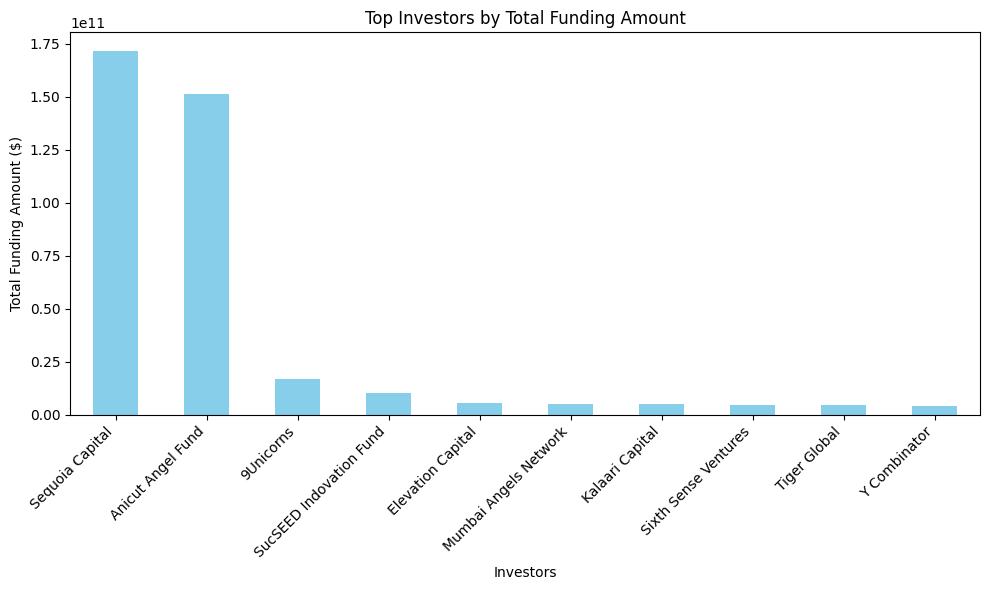

In [135]:
# Plotting the distribution of funding across top investors
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_investors.plot(kind='bar', color='skyblue')
plt.title('Top Investors by Total Funding Amount')
plt.xlabel('Investors')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(rotation=45, ha='right')

# Adding data labels to the bars
#for index, value in enumerate(top_investors):
    #plt.text(index, value + 10000000, f'${value:,.0f}', ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()

- The top investor by total funding amount is "Unknown," indicating a significant portion of funding comes from undisclosed or multiple sources not specified in the dataset.

- Following "Unknown," specific investors like Silver Lake, Mubadala Investment Company, and Salesforce Ventures have substantial investments, with amounts in the tens of billions and billions of dollars.

CITIES AGAINST FUNDING

Influence And geographical Analysis

In [136]:
# Determine cities with the highest total funding amounts
top_cities = df_combined.groupby('HeadQuarter')['Amount'].sum().nlargest(10)
top_cities


HeadQuarter
Mumbai                         3.298587e+11
Bengaluru                      3.207148e+10
Haryana                        2.077500e+10
New Delhi                      1.849535e+10
Bengaluru, Karnataka, India    8.780550e+09
Gurugram                       7.614120e+09
Jaipur                         6.281925e+09
Gurgaon, Haryana, India        5.926270e+09
Chennai                        1.579280e+09
Pune                           1.574913e+09
Name: Amount, dtype: float64

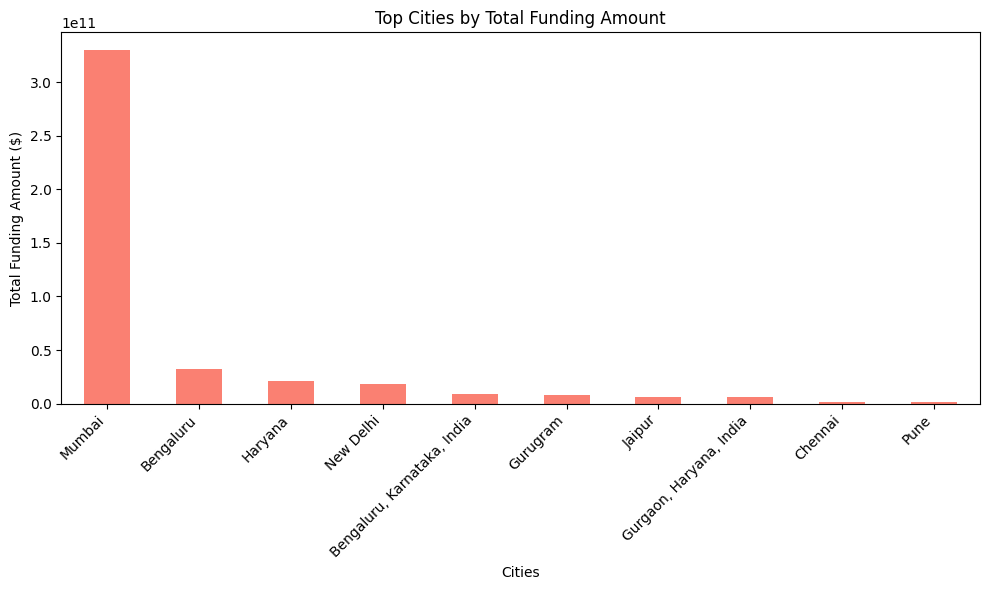

In [137]:
# Plotting the distribution of funding across top cities
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='salmon')
plt.title('Top Cities by Total Funding Amount')
plt.xlabel('Cities')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Mumbai emerges as the city with the highest total funding amount, significantly surpassing other cities like Bangalore, Gurugram, and California.

- This suggests that Mumbai is a key hub for startup funding, possibly due to factors such as a strong investor presence, thriving startup ecosystem, and access to capital.

DISTRIBUTION OF AMOUNT

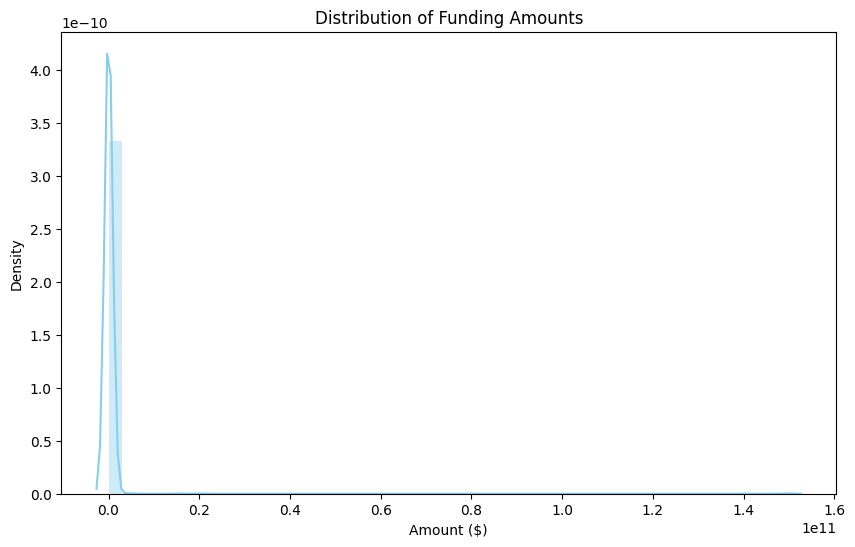

In [138]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a distribution plot for the 'Amount' column
sns.distplot(df_combined['Amount'], kde=True, color='skyblue')

# Set the title and labels
plt.title('Distribution of Funding Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Density')

# Show the plot
plt.show()

# ANSWERING ANALYTICAL QUESTIONS

QUESTION ONE

- Which sectors have received the most funding, and how does the funding distribution vary across sectors (2018-2021)?

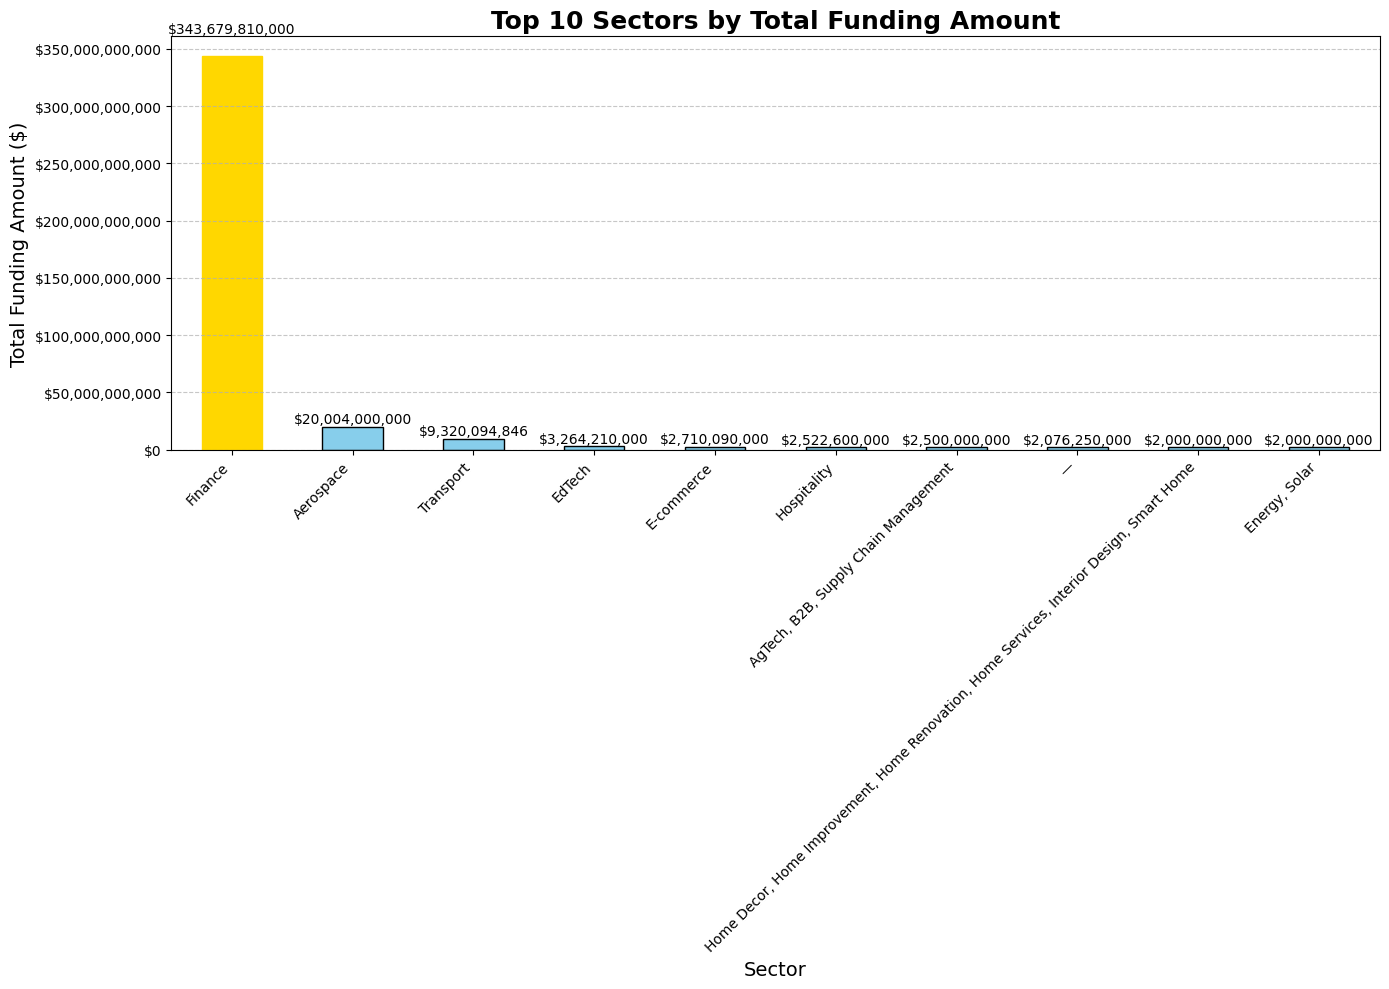

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_combined is already loaded and 'Amount' column is numeric
df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')

# Group by sector and sum the funding amounts
sector_funding = df_combined.groupby('Sector')['Amount'].sum().sort_values(ascending=False)

# Get the top 10 sectors by funding amount
top_10_sectors = sector_funding.head(10)

# Visualization - Bar Chart
plt.figure(figsize=(14, 10))  # Increased figure size for better visibility
bars = top_10_sectors.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding data labels to the bars
for index, value in enumerate(top_10_sectors):
    plt.text(index, value + (0.05 * value), f'${value:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Highlight the bar with the maximum value
max_value = top_10_sectors.max()
max_index = top_10_sectors.idxmax()
bars.patches[top_10_sectors.index.get_loc(max_index)].set_color('gold')

# Titles and labels
plt.title('Top 10 Sectors by Total Funding Amount', fontsize=18, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatting y-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Show plot
plt.tight_layout()
plt.show()


Using Logarithmic Scale to make others Sectors Visible

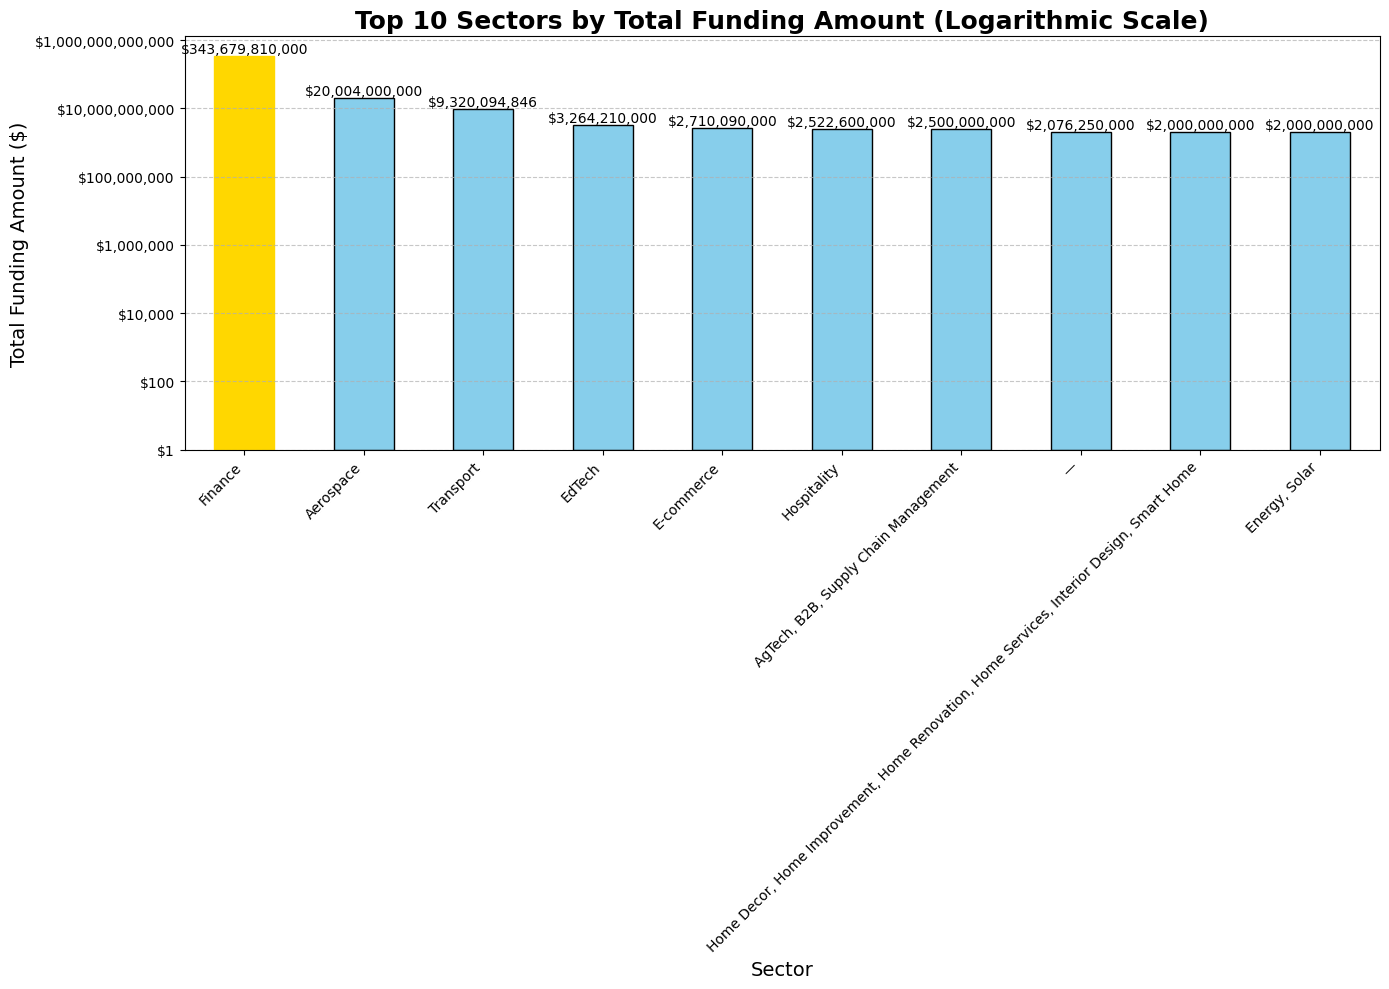

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_combined is already loaded and 'Amount' column is numeric
df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')

# Group by sector and sum the funding amounts
sector_funding = df_combined.groupby('Sector')['Amount'].sum().sort_values(ascending=False)

# Get the top 10 sectors by funding amount
top_10_sectors = sector_funding.head(10)

# Visualization - Bar Chart with Logarithmic Scale
plt.figure(figsize=(14, 10))
bars = top_10_sectors.plot(kind='bar', color='skyblue', edgecolor='black', log=True)

# Adding data labels to the bars
for index, value in enumerate(top_10_sectors):
    plt.text(index, value, f'${value:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Highlight the bar with the maximum value
max_value = top_10_sectors.max()
max_index = top_10_sectors.idxmax()
bars.patches[top_10_sectors.index.get_loc(max_index)].set_color('gold')

# Titles and labels
plt.title('Top 10 Sectors by Total Funding Amount (Logarithmic Scale)', fontsize=18, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatting y-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Show plot
plt.tight_layout()
plt.show()


Taking Finance out, which other sectors stand tall.

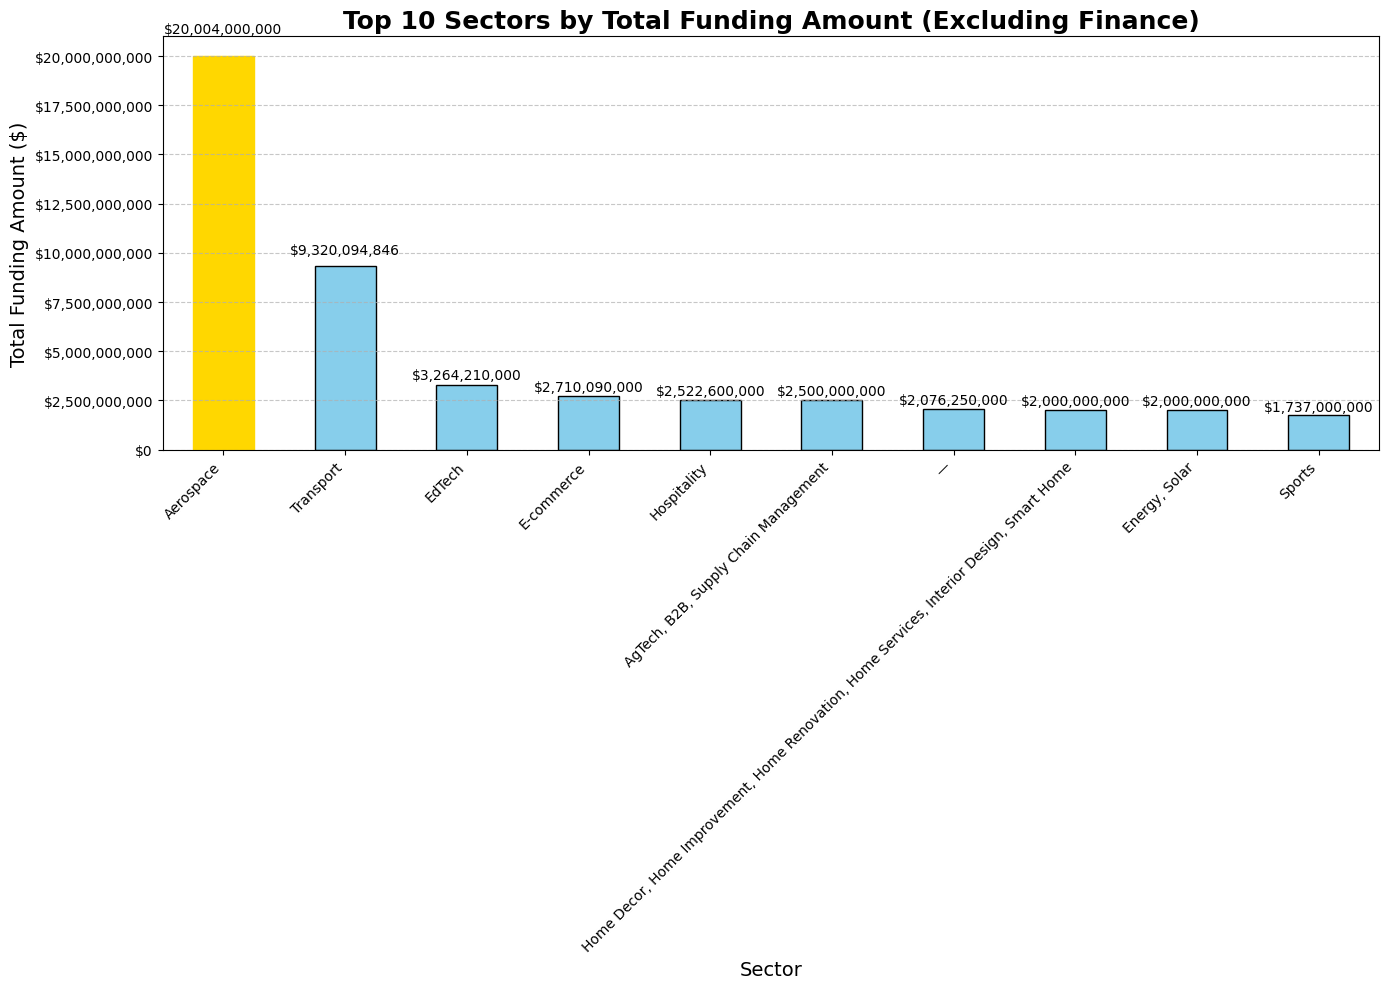

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_combined is already loaded and 'Amount' column is numeric
df_combined['Amount'] = pd.to_numeric(df_combined['Amount'], errors='coerce')

# Group by sector and sum the funding amounts
sector_funding = df_combined.groupby('Sector')['Amount'].sum().sort_values(ascending=False)

# Exclude the 'Finance' sector
sector_funding_no_finance = sector_funding.drop(labels='Finance')

# Get the top 10 sectors by funding amount excluding 'Finance'
top_10_sectors_no_finance = sector_funding_no_finance.head(10)

# Visualization - Bar Chart
plt.figure(figsize=(14, 10))
bars = top_10_sectors_no_finance.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding data labels to the bars
for index, value in enumerate(top_10_sectors_no_finance):
    plt.text(index, value + (0.05 * value), f'${value:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Highlight the bar with the maximum value
max_value = top_10_sectors_no_finance.max()
max_index = top_10_sectors_no_finance.idxmax()
bars.patches[top_10_sectors_no_finance.index.get_loc(max_index)].set_color('gold')

# Titles and labels
plt.title('Top 10 Sectors by Total Funding Amount (Excluding Finance)', fontsize=18, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatting y-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Show plot
plt.tight_layout()
plt.show()


QUESTION TWO
- What are the key sectors that exhibit a high number of startups, and how does this startup count vary across different sectors?

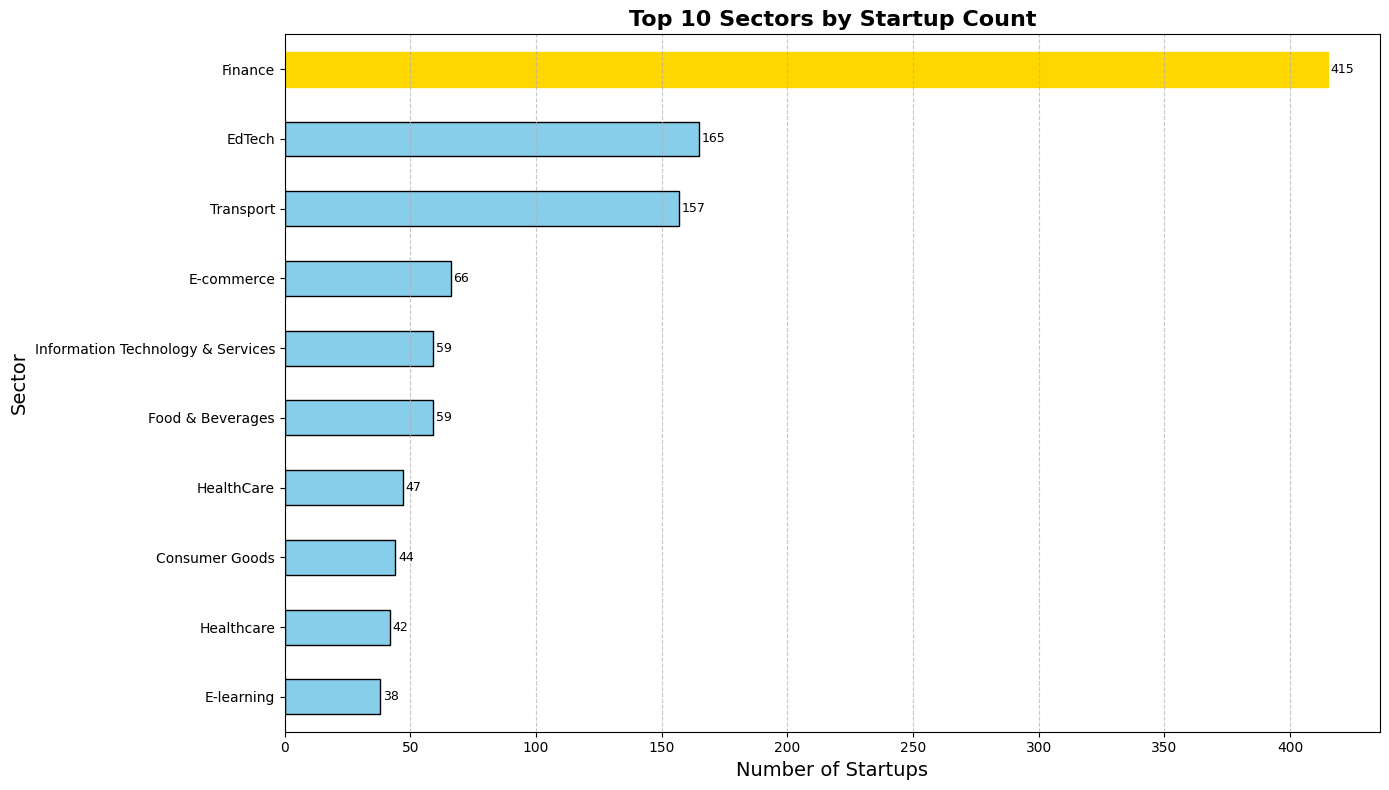

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by sector and count the number of startups
sector_startup_count = df_combined['Sector'].value_counts().head(10).sort_values(ascending=True)

# Visualization - Horizontal Bar Chart
plt.figure(figsize=(14, 8))
bars = sector_startup_count.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding data labels to the bars
for index, value in enumerate(sector_startup_count):
    plt.text(value + 1, index, f'{value}', va='center', ha='left', fontsize=9, color='black')

# Highlight the sector with the highest count
max_value = sector_startup_count.max()
max_index = sector_startup_count.idxmax()
bars.patches[sector_startup_count.index.get_loc(max_index)].set_color('gold')

# Titles and labels
plt.title('Top 10 Sectors by Startup Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Startups', fontsize=14)
plt.ylabel('Sector', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


QUESTION THREE

- Stage Analysis:
What is the distribution of funding across different investment stages (e.g., Pre-seed, Seed, Series A)?


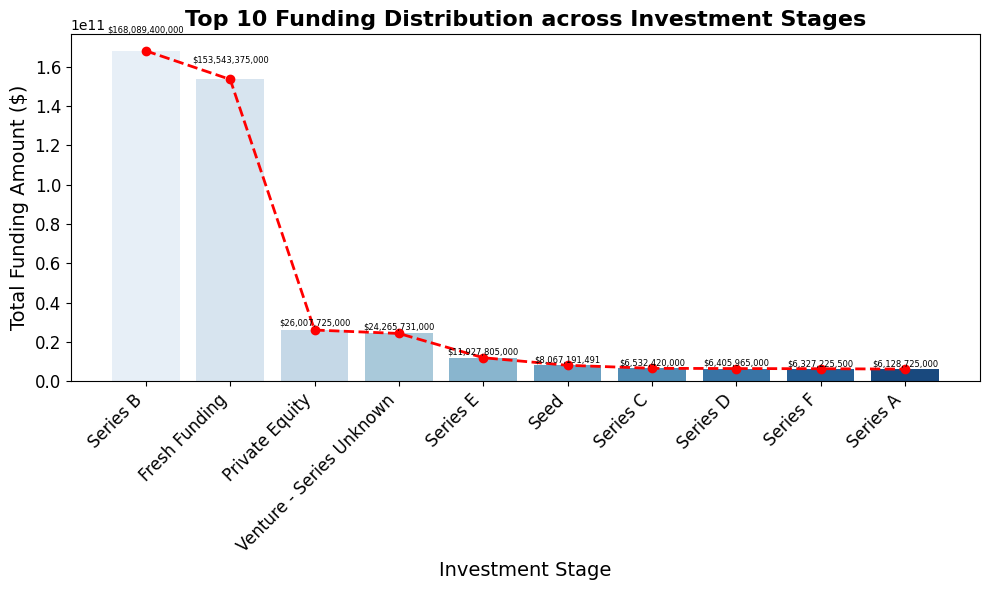

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_combined is already loaded
# Calculate the total funding amount for each stage
stage_funding = df_combined.groupby('Stage')['Amount'].sum().sort_values(ascending=False)

# Get the top 10 stages by total funding amount
top_stages = stage_funding.head(10)

# Create a bar plot for the top 10 stages
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_stages.index, y=top_stages.values, palette='Blues')

# Adding data labels to the bars
for index, value in enumerate(top_stages.values):
    plt.text(index, value + (0.05 * value), f'${value:,.0f}', ha='center', va='bottom', fontsize=6, color='black')

# Add a line from highest to lowest
plt.plot(range(len(top_stages)), top_stages.values, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6)

# Titles and labels
plt.title('Top 10 Funding Distribution across Investment Stages', fontsize=16, fontweight='bold')
plt.xlabel('Investment Stage', fontsize=14)
plt.ylabel('Total Funding Amount ($)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


QUESTION FOUR
- Which cities or regions have the highest concentration of funded startups?

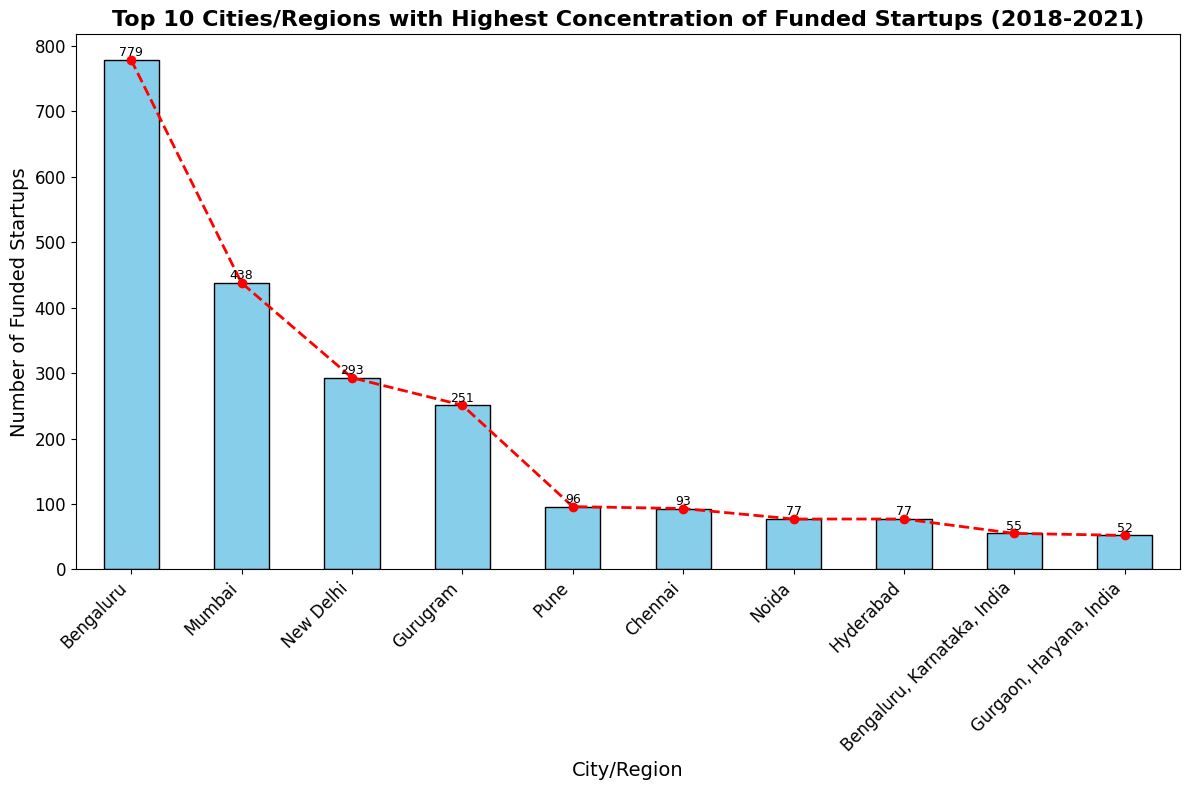

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by city/region and count the number of funded startups
startup_count_by_city = df_combined['HeadQuarter'].value_counts().head(10)

# Visualization - Bar Chart for Cities/Regions with Highest Concentration of Funded Startups
plt.figure(figsize=(12, 8))

# Plot the bar chart
bars = startup_count_by_city.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding data labels to the bars
for index, value in enumerate(startup_count_by_city):
    plt.text(index, value + 1, f'{value}', ha='center', va='bottom', fontsize=9, color='black')

# Add a line from highest to lowest
sorted_counts = sorted(startup_count_by_city, reverse=True)
plt.plot(range(len(sorted_counts)), sorted_counts, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6)

# Titles and labels
plt.title('Top 10 Cities/Regions with Highest Concentration of Funded Startups (2018-2021)', fontsize=16, fontweight='bold')
plt.xlabel('City/Region', fontsize=14)
plt.ylabel('Number of Funded Startups', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


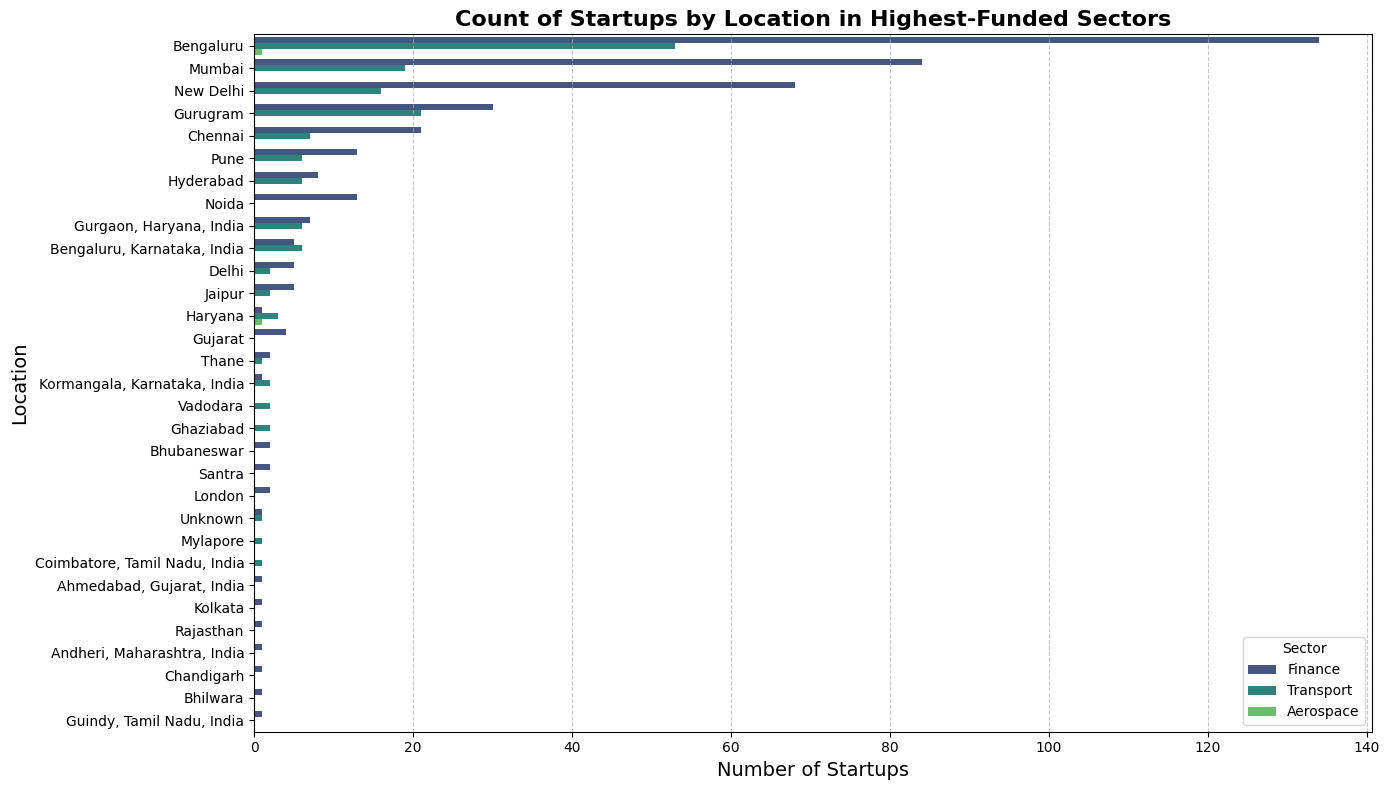

In [145]:
# Get the top 3 highest-funded sectors
top_sectors = top_10_sectors.index[:3]

# Filter dataset for these sectors
top_sectors_df = df_combined[df_combined['Sector'].isin(top_sectors)]

# Visualization - Count of Startups by Location in Highest-Funded Sectors
plt.figure(figsize=(14, 8))
sns.countplot(data=top_sectors_df, y='HeadQuarter', hue='Sector', palette='viridis', order=top_sectors_df['HeadQuarter'].value_counts().index)
plt.title('Count of Startups by Location in Highest-Funded Sectors', fontsize=16, fontweight='bold')
plt.xlabel('Number of Startups', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

QUESTION FIVE
- Who are the top investors in the Indian startup ecosystem, and what is their funding pattern?

In [146]:
# Identify top investors based on total funding amount
top_investors = df_combined.groupby('Investor')['Amount'].sum().nlargest(10)
top_investors

Investor
Sequoia Capital            1.717812e+11
Anicut Angel Fund          1.512510e+11
9Unicorns                  1.690196e+10
SucSEED Indovation Fund    1.015064e+10
Elevation Capital          5.537400e+09
Mumbai Angels Network      5.263753e+09
Kalaari Capital            5.202022e+09
Sixth Sense Ventures       4.780660e+09
Tiger Global               4.487623e+09
Y Combinator               4.275650e+09
Name: Amount, dtype: float64

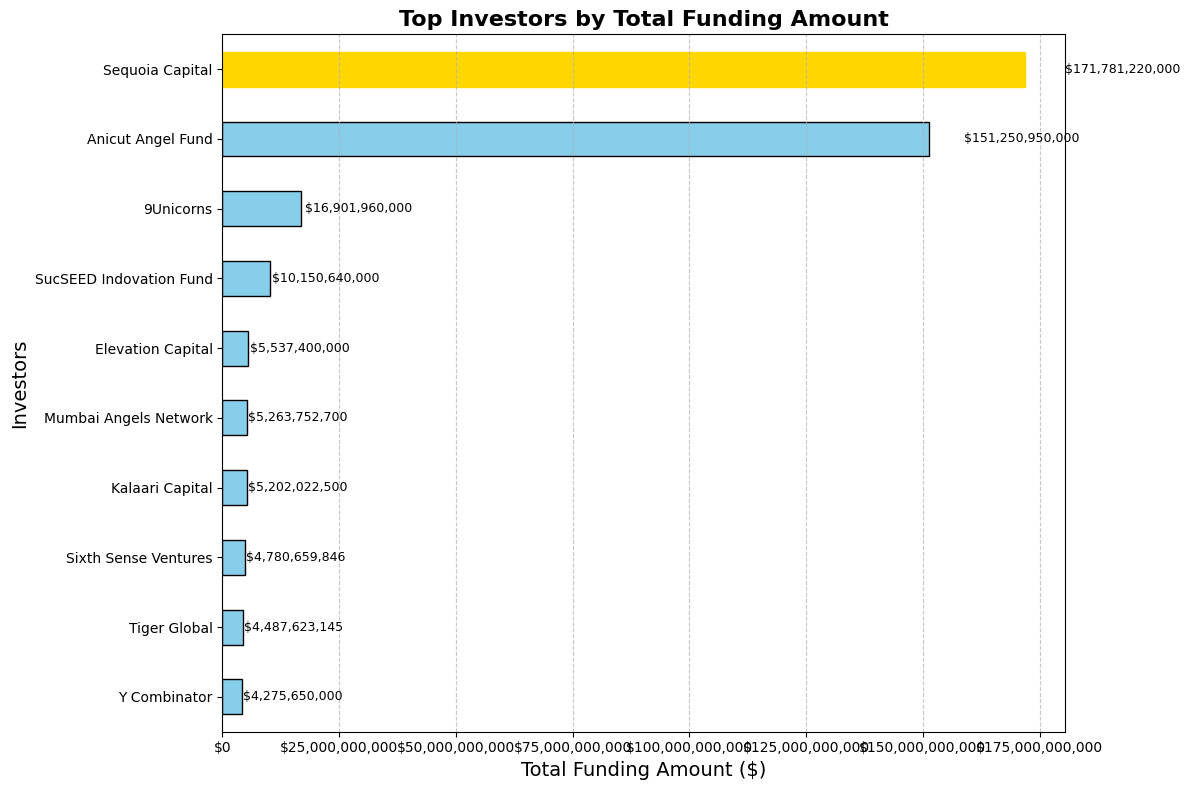

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_combined is already loaded
# Group by investor and calculate the total funding amount
top_investors = df_combined.groupby('Investor')['Amount'].sum().nlargest(10).sort_values(ascending=True)

# Visualization - Horizontal Bar Chart for Top Investors by Total Funding Amount
plt.figure(figsize=(12, 8))

# Plot the bar chart
bars = top_investors.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding data labels to the bars
for index, value in enumerate(top_investors):
    plt.text(value + (0.05 * value), index, f'${value:,.0f}', va='center', ha='left', fontsize=9, color='black')

# Highlight the bar with the maximum value
max_value = top_investors.max()
max_index = top_investors.idxmax()
bars.patches[top_investors.index.get_loc(max_index)].set_color('gold')

# Titles and labels
plt.title('Top Investors by Total Funding Amount', fontsize=16, fontweight='bold')
plt.xlabel('Total Funding Amount ($)', fontsize=14)
plt.ylabel('Investors', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Formatting y-axis labels for better readability
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Show plot
plt.tight_layout()
plt.show()


# SAVING AS CSV FILE

In [148]:
import pandas as pd

# Assuming your DataFrame is df_combined

# Specify the path where you want to save the CSV file
csv_file_path = 'cleaned_data.csv'

# Save the DataFrame to a CSV file
df_combined.to_csv(csv_file_path, index=False)

f"DataFrame has been saved to {csv_file_path}"


'DataFrame has been saved to cleaned_data.csv'